# Document/Photo Classifier

## Description

TODO

## Import python packages

In [167]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
%matplotlib inline
 
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os

## Configure your paths here

In [144]:
PROJECT_DIRECTORY = '/Users/cpoole/Git/PracticeWeekProject2018Q3/CNN_Simple_Model_2_Categories'
IMAGE_DIRECTORY = str.format('{}/doctypes', PROJECT_DIRECTORY)
PLOT = str.format('{}/Output.png', PROJECT_DIRECTORY)
MODEL = str.format('/{}/Model.h5', PROJECT_DIRECTORY)

In [145]:
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


In [146]:
# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(IMAGE_DIRECTORY)))
random.seed(42)
random.shuffle(imagePaths)

In [147]:
# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be 32x32 pixels (ignoring
    # aspect ratio), flatten the image into 32x32x3=3072 pixel image
    # into a list, and store the image in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32)).flatten()
    data.append(image)
 
    # extract the class label from the image path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

In [148]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [149]:
data.shape

(392, 3072)

In [150]:
# partition the data into training and testing splits using 70% of
# the data for training and the remaining 30% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.30, random_state=42)

In [151]:
# convert the labels from integers to vectors (for 2-class, binary
# classification you should use Keras' to_categorical function
# instead as the scikit-learn's LabelBinarizer will not return a
# vector)
lb = LabelBinarizer()
#trainY = lb.fit_transform(trainY)
#testY = lb.transform(testY)
print(trainY)
trainY = to_categorical(trainY)
print(trainY)
testY = to_categorical(testY)

['1' '1' '1' '0' '1' '1' '0' '0' '0' '1' '1' '0' '1' '0' '1' '1' '1' '1'
 '1' '1' '0' '1' '0' '1' '0' '1' '0' '1' '0' '1' '1' '1' '0' '1' '1' '0'
 '1' '0' '0' '1' '1' '1' '1' '1' '0' '0' '1' '0' '0' '1' '1' '1' '1' '1'
 '0' '1' '0' '1' '1' '1' '1' '0' '0' '1' '1' '1' '0' '1' '0' '1' '0' '1'
 '1' '1' '1' '1' '1' '1' '0' '0' '1' '1' '1' '1' '1' '1' '1' '0' '0' '0'
 '1' '1' '0' '1' '1' '1' '1' '0' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1'
 '1' '0' '1' '0' '1' '0' '0' '1' '1' '1' '1' '1' '1' '1' '0' '0' '1' '1'
 '1' '1' '1' '1' '0' '1' '1' '0' '0' '0' '1' '1' '1' '1' '1' '0' '0' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1'
 '1' '1' '1' '0' '1' '1' '1' '0' '1' '0' '0' '1' '0' '1' '1' '0' '1' '1'
 '1' '0' '1' '0' '0' '0' '0' '1' '1' '1' '0' '0' '1' '0' '1' '0' '0' '1'
 '0' '1' '0' '0' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '0' '1' '0' '0' '1' '1' '0' '1'
 '1' '1' '1' '1' '1' '0' '1' '1' '1' '0' '1' '1' '1

In [152]:
# define the 3072-1024-512-3 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="sigmoid"))
model.add(Dense(512, activation="sigmoid"))
model.add(Dense(2, activation="softmax"))

In [153]:
# initialize our initial learning rate and # of epochs to train for
INIT_LR = 0.01
EPOCHS =75

In [154]:
# compilg the model using SGD as our optimizer and categorical
# cross-entropy loss (you'll want to use binary_crossentropy
# for 2-class classification)
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] training network...


In [155]:
# train the neural network
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS, batch_size=32)

Train on 274 samples, validate on 118 samples
Epoch 1/75
274/274 [==============================] - 1s 3ms/step - loss: 0.6381 - acc: 0.6277 - val_loss: 0.6019 - val_acc: 0.6864
Epoch 2/75
274/274 [==============================] - 0s 760us/step - loss: 0.5953 - acc: 0.7007 - val_loss: 0.5782 - val_acc: 0.6864
Epoch 3/75
274/274 [==============================] - 0s 762us/step - loss: 0.5618 - acc: 0.7007 - val_loss: 0.5486 - val_acc: 0.6864
Epoch 4/75
274/274 [==============================] - 0s 754us/step - loss: 0.5324 - acc: 0.7007 - val_loss: 0.5269 - val_acc: 0.6864
Epoch 5/75
274/274 [==============================] - 0s 778us/step - loss: 0.5143 - acc: 0.7299 - val_loss: 0.5138 - val_acc: 0.6864
Epoch 6/75
274/274 [==============================] - 0s 770us/step - loss: 0.4854 - acc: 0.7518 - val_loss: 0.4824 - val_acc: 0.6864
Epoch 7/75
274/274 [==============================] - 0s 759us/step - loss: 0.4767 - acc: 0.7336 - val_loss: 0.4724 - val_acc: 0.6864
Epoch 8/75
274/274

274/274 [==============================] - 0s 804us/step - loss: 0.1046 - acc: 0.9927 - val_loss: 0.1040 - val_acc: 1.0000
Epoch 62/75
274/274 [==============================] - 0s 788us/step - loss: 0.1021 - acc: 0.9927 - val_loss: 0.1024 - val_acc: 1.0000
Epoch 63/75
274/274 [==============================] - 0s 784us/step - loss: 0.1014 - acc: 0.9927 - val_loss: 0.1013 - val_acc: 1.0000
Epoch 64/75
274/274 [==============================] - 0s 782us/step - loss: 0.0998 - acc: 0.9891 - val_loss: 0.0985 - val_acc: 1.0000
Epoch 65/75
274/274 [==============================] - 0s 778us/step - loss: 0.0976 - acc: 0.9927 - val_loss: 0.0976 - val_acc: 1.0000
Epoch 66/75
274/274 [==============================] - 0s 769us/step - loss: 0.0953 - acc: 0.9964 - val_loss: 0.0954 - val_acc: 1.0000
Epoch 67/75
274/274 [==============================] - 0s 779us/step - loss: 0.0939 - acc: 0.9927 - val_loss: 0.0952 - val_acc: 1.0000
Epoch 68/75
274/274 [==============================] - 0s 781us/ste

In [156]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=["form","pic"]))
print(accuracy_score(testY.argmax(axis=1), predictions.argmax(axis=1)))

[INFO] evaluating network...
             precision    recall  f1-score   support

       form       1.00      1.00      1.00        37
        pic       1.00      1.00      1.00        81

avg / total       1.00      1.00      1.00       118

1.0


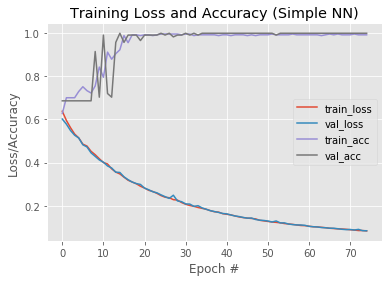

In [157]:
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(PLOT)

In [158]:
# save the model and label binarizer to disk
print("[INFO] serializing network and label binarizer...")
model.save(MODEL)
f = open(MODEL, "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...


## Feed new images into the model and have it predict whether the image is of a document or not.

In [159]:
newImage = '/Users/cpoole/Git/PracticeWeekProject2018Q3/forms_ORIGINAL/applications/00000001.jpg'

newImage = cv2.imread(newImage)

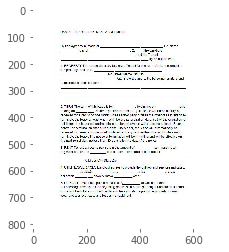

In [160]:
plt.imshow(newImage)

In [161]:
newImageData = []
newImage = cv2.resize(newImage, (32, 32)).flatten()

In [162]:
newImageData.append(newImage)
newImageData = np.array(newImageData, dtype="float") / 255.0

In [163]:
newImageData.shape

(1, 3072)

In [164]:
prediction = model.predict(newImageData, batch_size=1)

In [165]:
def print_predicted_label():
    
    documentPrediction = prediction[0][0]
    photoPrediction = prediction[0][1]
    
    if documentPrediction > photoPrediction:
        print(str.format('The image is predicted to be a document with {} confidence.', documentPrediction))
    elif photoPrediction > documentPrediction:
        print(str.format('The image is predicted to be a photo with {} confidence.', photoPrediction))
    else:
        print('The image could not be predicted to be a document or photo.')

In [166]:
print_predicted_label()

The image is predicted to be a document with 0.8893291354179382 confidence.
